In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from scipy import stats


from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, GroupKFold, GridSearchCV, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsRegressor, KernelDensity, KDTree
from sklearn.metrics import *

from imblearn.over_sampling import SMOTENC,SMOTE


# Load the data

In [ ]:
maindf=pd.read_csv("../input/imbalanced-data-practice/aug_train.csv")
print("### Head ### \n",maindf[0:5],"\n")
print("### Tail ### \n",maindf[len(maindf)-5:len(maindf)])


In [ ]:
print(maindf.info())
print(maindf.describe())


## visulaising data in Tableau

### Creataing Bar graph with %
1. Create groups for response (target variable),Previously Insured,Driving license,Vechicle age, Vechicle damage,Gender in data the section.(available near the small drop down in each columns )
2. Now bring response(group) to coloumn section. Make sure that 'aggregate' is turned on in 'analysis' tab available in menu bar
3. Now bring the number of records in row section. By  default, it create a bar graph. We can also use pie chart
4. Right click on the bar graph and select 'mark label', and turn on Lables to 'always show'
5. To show different colors, we can drag and drop 'response group' field to colors section in the 'marks' tab 
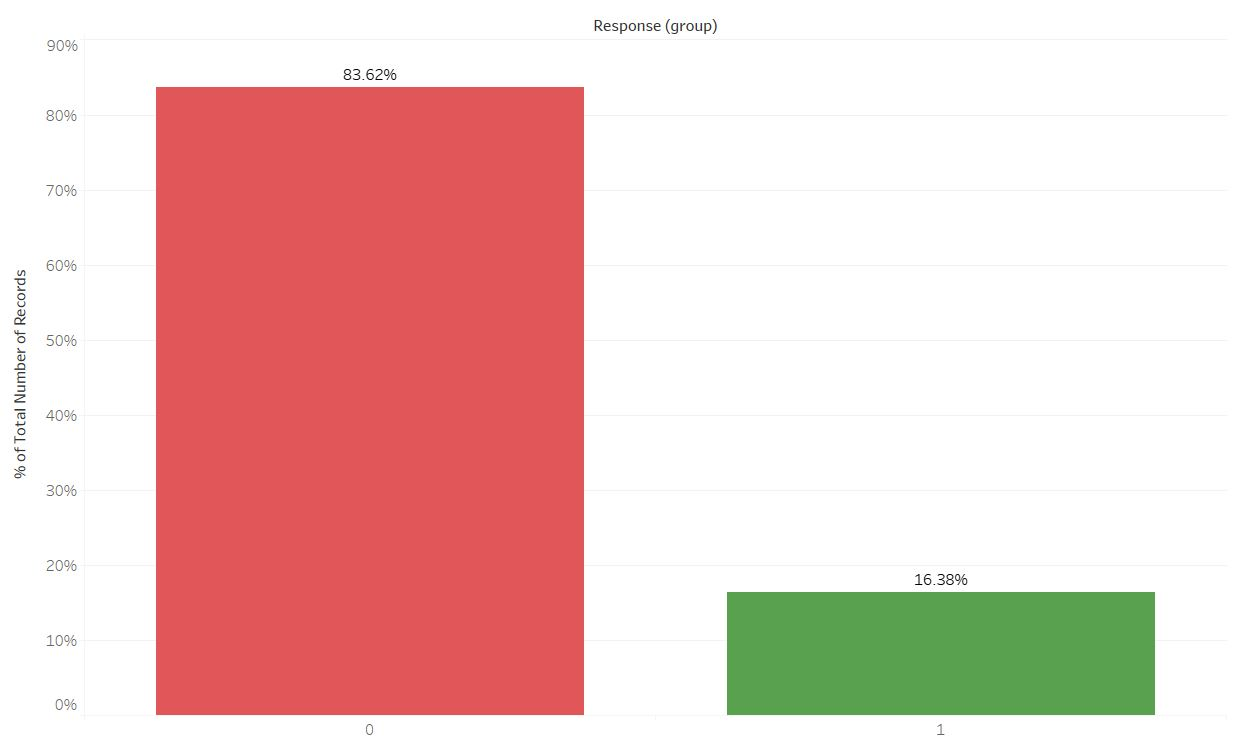

Creating a annual preimum and the number of records within the bin
1. Create bin for annual count
2. Use number of records and change to COUNT 
3. For top three bars, we will show the count by enabling the mark label to always show
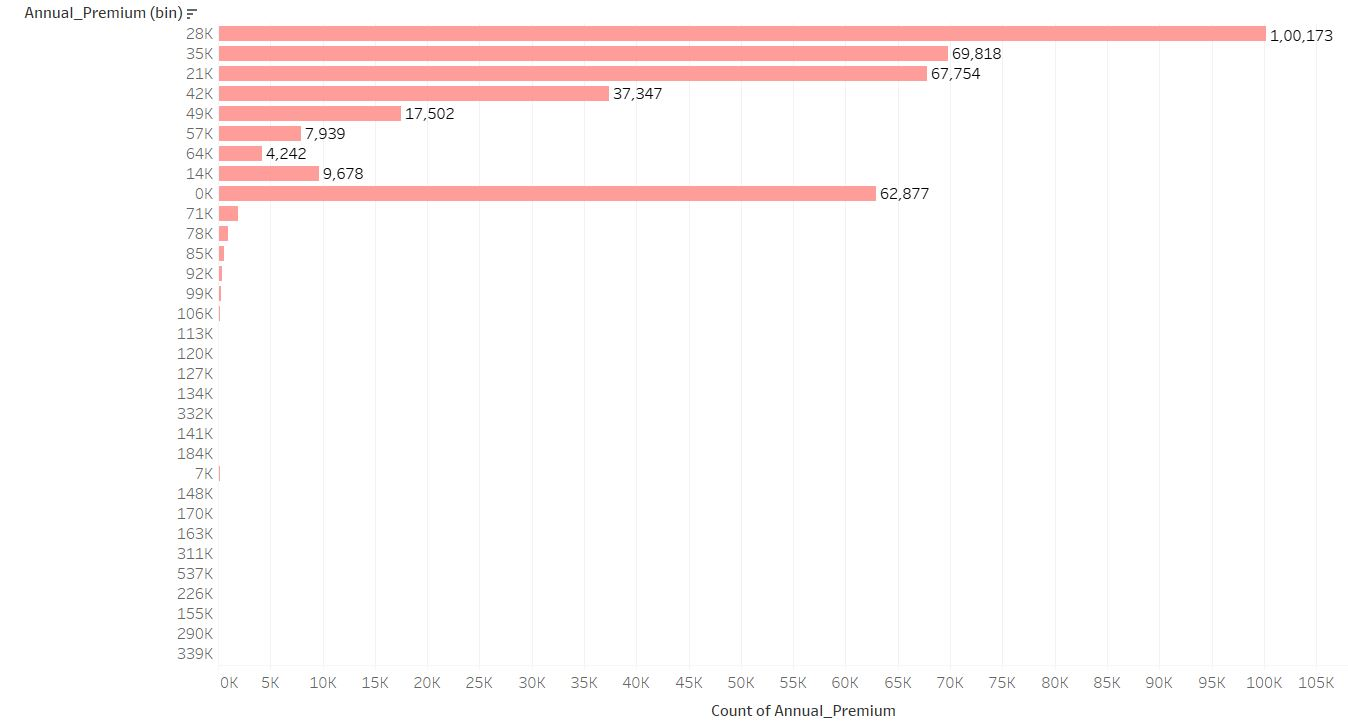
Anual premium with 28k is the highest

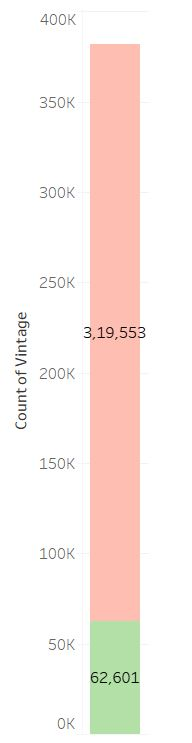

In [ ]:
cateogrical_cols = [cols for cols in maindf.columns if maindf[cols].dtypes =='object']
print('Categories', cateogrical_cols)

numeric_cols = [cols for cols in maindf.columns if cols not in cateogrical_cols]
print('Numerics', numeric_cols)
# transform cateogrical cols to lables by label encoder



for cols in cateogrical_cols:
    le=LabelEncoder()
    le.fit(list(maindf[cols].astype('str')))
    maindf[cols] = le.transform(list(maindf[cols].astype(str))) 


In [ ]:
maindf[0:3]

In [ ]:
maindf=maindf.drop('id',1)
target=maindf.pop("Response")


In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(pd.concat([maindf, target], axis=1).corr(),annot=True , cmap='vlag') 

In [ ]:
maindf

In [ ]:
target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    maindf, target, test_size=0.33, random_state=42)


In [ ]:
clf0=RandomForestClassifier()
model = clf0.fit(X_train,y_train)
pred_y0=model.predict(X_test)
accuracy_score(y_test, pred_y0)

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
clf1=BalancedRandomForestClassifier(sampling_strategy=0.2)
model = clf1.fit(X_train,y_train)
pred_y2=model.predict(X_test)
accuracy_score(y_test, pred_y2)

In [ ]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
clf2=RandomForestClassifier()
model2=clf2.fit(X_resampled, y_resampled)
perd_y3=model.predict(X_test)
accuracy_score(y_test,perd_y3)

In [ ]:
# we will use SMOTE random classifier

train=pd.read_csv("../input/imbalanced-data-practice/aug_train.csv")
test=pd.read_csv("../input/imbalanced-data-practice/aug_test.csv")

In [ ]:
for c in cateogrical_cols:
    le=LabelEncoder()
    le.fit(list(train[c].astype('str')) + list(test[c].astype('str')))
    train[c] = le.transform(list(train[c].astype(str))) 
    test[c] = le.transform(list(test[c].astype(str))) 
train.head()


In [ ]:
final_y=train.pop("Response")
final_X=train.drop("id",1)


In [ ]:
testing=test.drop("id",1)
testing

In [ ]:
final_X_resampled, final_y_resampled = SMOTE().fit_resample(final_X, final_y)
final_clf=RandomForestClassifier()
final_model=final_clf.fit(final_X_resampled, final_y_resampled)
prediction=model.predict(testing)


In [ ]:
prediction

In [ ]:
to_submission=pd.DataFrame(list(zip(test['id'],prediction)),columns=["id","predict"])

In [ ]:
to_submission.to_csv("submission.csv",header=True,index=False)

Using this, going to implement this as a end to end project wheather to provide or they will take up the loan or not (yes/no)